In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Get Data

### Get Tables from DB into DataFrame

In [2]:
conn = sqlite3.connect("books.db")
cursor = conn.cursor()

In [3]:
# Query to get table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print table names
for table in tables:
    print(table[0])

books


In [4]:
query = cursor.execute("SELECT * FROM books;")
cols = [column[0] for column in query.description]
genres_df = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [5]:
print(genres_df.head)

<bound method NDFrame.head of                                                  authors  average_rating  \
0                 [{'author_id': '3041852', 'role': ''}]            4.13   
1                   [{'author_id': '19158', 'role': ''}]            4.22   
2                    [{'author_id': '5411', 'role': ''}]            4.43   
3      [{'author_id': '589328', 'role': ''}, {'author...            4.29   
4                  [{'author_id': '169159', 'role': ''}]            3.57   
...                                                  ...             ...   
99995               [{'author_id': '31468', 'role': ''}]            3.54   
99996  [{'author_id': '1319428', 'role': ''}, {'autho...            3.77   
99997             [{'author_id': '4874418', 'role': ''}]            4.27   
99998  [{'author_id': '166573', 'role': ''}, {'author...            3.69   
99999  [{'author_id': '6509355', 'role': ''}, {'autho...            3.69   

        book_id                                        de

In [6]:
conn.close()

In [7]:
genres_df.dtypes

authors                       object
average_rating               float64
book_id                        int64
description                   object
genres                        object
is_children                   object
is_comics_graphics            object
is_fantasy_paranormal         object
is_history_biography          object
is_mystery_thriller_crime     object
is_poetry                     object
is_romance                    object
is_young_adult                object
num_pages                     object
ratings_count                  int64
series                        object
similar_books                 object
title                         object
title_without_series          object
dtype: object

# EDA

### For genres

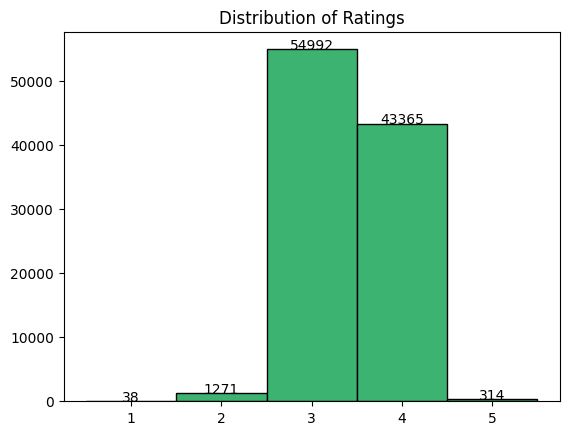

In [8]:
# histogram of ratings across all genres 
 
plt.title("Distribution of Ratings")
 
counts, bins, patches = plt.hist(genres_df['average_rating'], bins=range(1, 7), align='left', edgecolor='black', color='mediumseagreen')
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count + 0.5, int(count), ha='center')

In [9]:
# get mean, median, mode, and standard deviation of ratings and ratings count

print("more stats from describe() method:")
print(genres_df.describe())

more stats from describe() method:
       average_rating       book_id  ratings_count
count   100000.000000  1.000000e+05   1.000000e+05
mean         3.911249  1.060296e+07   5.036760e+02
std          0.364896  1.018308e+07   9.426244e+03
min          0.000000  5.000000e+00   0.000000e+00
25%          3.710000  1.415525e+06   1.000000e+01
50%          3.940000  7.094745e+06   3.100000e+01
75%          4.140000  1.817522e+07   9.700000e+01
max          5.000000  3.646988e+07   1.876252e+06


In [10]:
highest_rated = genres_df.sort_values('average_rating', ascending=False).head(5)
lowest_rated = genres_df.sort_values('average_rating', ascending=True).head(5)

# Print the highest rated books based on average_rating 
print("Top 5 Highest Rated Books Based on average_rating:")
for i, (index, book) in enumerate(highest_rated.iterrows(), 1):
    print(f"{i}. {book['title']} - Rating: {book['average_rating']}, Number of Ratings: {book['ratings_count']}")

# Print the lowest rated books based on average_rating
print("\nBottom 5 Lowest Rated Books Based on average_rating:")
for i, (index, book) in enumerate(lowest_rated.iterrows(), 1):
    print(f"{i}. {book['title']} - Rating: {book['average_rating']}, Number of Ratings: {book['ratings_count']}")

Top 5 Highest Rated Books Based on average_rating:
1. Tricycle and Friends: True-Life Adventures of a Three-Legged Golden Retriever and His Rescued Farm Animal Friends - Rating: 5.0, Number of Ratings: 3
2. Rockets & Spaceflight - Rating: 5.0, Number of Ratings: 1
3. Cyril the Dragon (The Jellybean the Dragon Stories #2) - Rating: 5.0, Number of Ratings: 16
4. Pooke and Kark In The Ark - Rating: 5.0, Number of Ratings: 1
5. Prairie Dog Play Days Includes Little Stinker & Bald Eagle Rules - Rating: 5.0, Number of Ratings: 2

Bottom 5 Lowest Rated Books Based on average_rating:
1. The True Story of Christmas - Rating: 0.0, Number of Ratings: 0
2. The Musicians of Bremen - Rating: 0.0, Number of Ratings: 0
3. Unknown Book 7672844 - Rating: 0.0, Number of Ratings: 0
4. The Orphan Band of Springdale - Rating: 0.0, Number of Ratings: 0
5. Kwanzaa an African American Holiday - Rating: 0.0, Number of Ratings: 0


In [11]:
highest_rated = genres_df.sort_values('ratings_count', ascending=False).head(5)
lowest_rated = genres_df.sort_values('ratings_count', ascending=True).head(5)

# Print the highest rated books based on ratings_count
print("Top 5 Highest Rated Books Based on ratings_count:")
for i, (index, book) in enumerate(highest_rated.iterrows(), 1):
    print(f"{i}. {book['title']} - Number of Ratings: {book['ratings_count']}, Rating: {book['average_rating']}")

# Print the lowest rated books based on ratings_count 
print("\nBottom 5 Lowest Rated Books Based on ratings_count:")
for i, (index, book) in enumerate(lowest_rated.iterrows(), 1):
    print(f"{i}. {book['title']} - Number of Ratings: {book['ratings_count']}, Rating: {book['average_rating']}")

Top 5 Highest Rated Books Based on ratings_count:
1. Harry Potter and the Prisoner of Azkaban (Harry Potter, #3) - Number of Ratings: 1876252, Rating: 4.53
2. The Little Prince - Number of Ratings: 763309, Rating: 4.28
3. The Secret Garden - Number of Ratings: 652211, Rating: 4.12
4. Where the Wild Things Are - Number of Ratings: 635947, Rating: 4.22
5. Anne of Green Gables (Anne of Green Gables, #1) - Number of Ratings: 513174, Rating: 4.23

Bottom 5 Lowest Rated Books Based on ratings_count:
1. Drip, Drop - Number of Ratings: 0, Rating: 3.67
2. Alice's äfventyr i sagolandet - Number of Ratings: 0, Rating: 4.0
3. Pirate Diary: The Journal of Jake Carpenter - Number of Ratings: 0, Rating: 4.07
4. The Kids' Multicultural Cookbook: Food & Fun Around the World - Number of Ratings: 0, Rating: 4.23
5. Eggs over Evie - Number of Ratings: 0, Rating: 3.78



Pearson correlation coefficient: 0.0281
P-value: 5.7392e-19


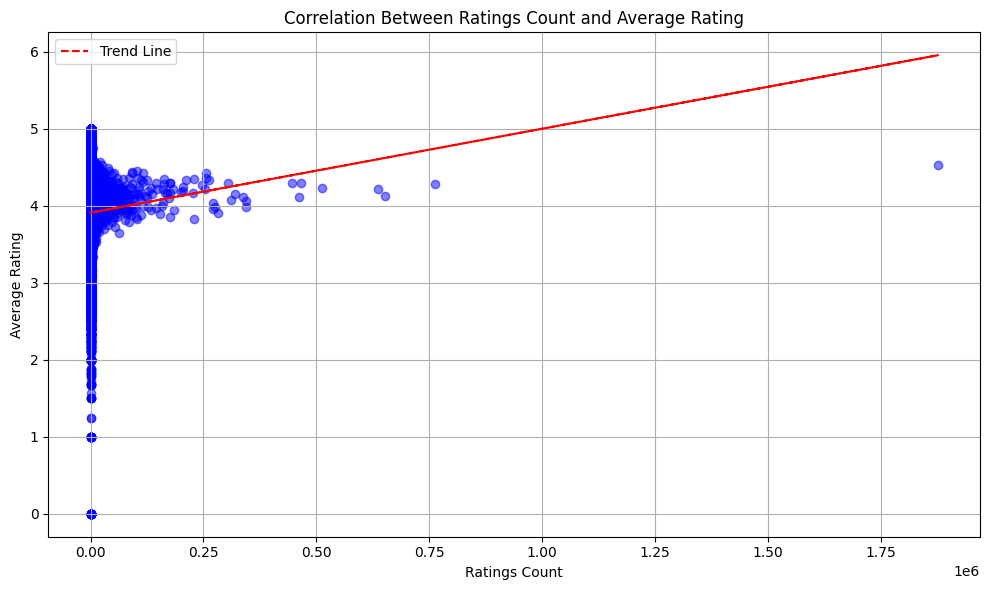

In [12]:
filtered_books = genres_df[['ratings_count', 'average_rating']].dropna()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_books['ratings_count'], filtered_books['average_rating'], alpha=0.5, color='blue')
plt.xlabel('Ratings Count')
plt.ylabel('Average Rating')
plt.title('Correlation Between Ratings Count and Average Rating')
plt.grid(True)

# Add regression line
x = filtered_books['ratings_count']
y = filtered_books['average_rating']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color='red', linestyle='--', label='Trend Line')

# Compute correlation coefficient
corr_coef, p_value = pearsonr(x, y)
print(f"\nPearson correlation coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4e}")

plt.legend()
plt.tight_layout()
plt.show()